In [1]:
from task2vec import Task2Vec
from models import get_model
import datasets
import task_similarity

c:\Users\Talout-elitBook\Desktop\aws-cv-task2vec\task2vecproject\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_names = ('stl10', 'mnist', 'cifar10', 'cifar100', 'letters', 'kmnist')
# Change `root` with the directory you want to use to download the datasets
dataset_list = [datasets.__dict__[name](root='./data')[0] for name in dataset_names] 

100%|██████████| 2.64G/2.64G [41:57<00:00, 1.05MB/s]  


Extracting ./data\stl10_binary.tar.gz to ./data
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:10<00:00, 931kB/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 411kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:03<00:00, 546kB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 170M/170M [00:07<00:00, 24.2MB/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data


100%|██████████| 169M/169M [00:06<00:00, 25.3MB/s] 


Extracting ./data\cifar-100-python.tar.gz to ./data


100%|██████████| 562M/562M [00:37<00:00, 15.0MB/s] 


Extracting ./data\EMNIST\raw\gzip.zip to ./data\EMNIST\raw


100%|██████████| 18.2M/18.2M [01:09<00:00, 263kB/s]


Extracting ./data\KMNIST\raw\train-images-idx3-ubyte.gz to ./data\KMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 131kB/s]


Extracting ./data\KMNIST\raw\train-labels-idx1-ubyte.gz to ./data\KMNIST\raw



100%|██████████| 3.04M/3.04M [00:18<00:00, 167kB/s]


Extracting ./data\KMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\KMNIST\raw



100%|██████████| 5.12k/5.12k [00:00<?, ?B/s]

Extracting ./data\KMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\KMNIST\raw



In [3]:
embeddings = []
for name, dataset in zip(dataset_names, dataset_list):
    print(f"Embedding {name}")
    probe_network = get_model('resnet34', pretrained=True, num_classes=int(max(dataset.targets)+1)).cuda()
    embeddings.append( Task2Vec(probe_network, max_samples=1000, skip_layers=6).embed(dataset) )

Embedding stl10


c:\Users\Talout-elitBook\Desktop\aws-cv-task2vec\task2vecproject\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Talout-elitBook\Desktop\aws-cv-task2vec\task2vecproject\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AssertionError: Torch not compiled with CUDA enabled

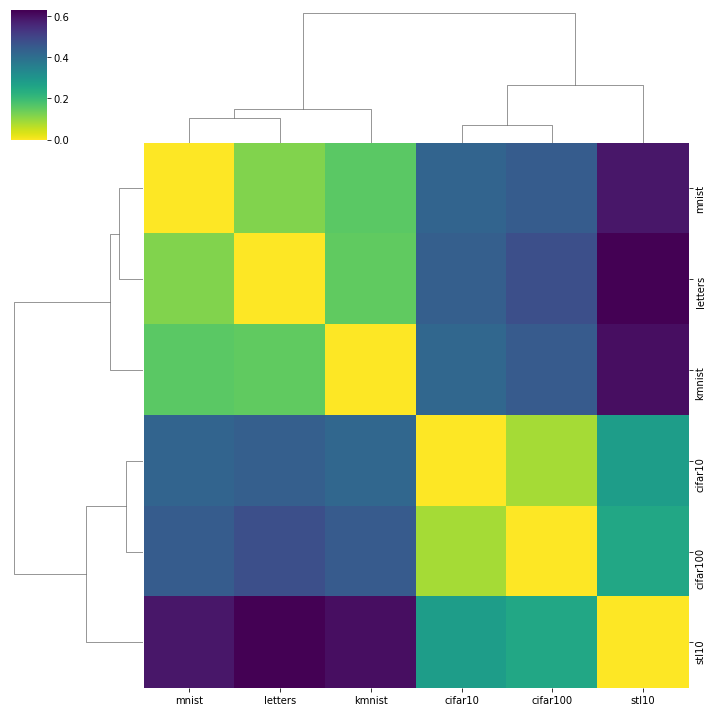

In [ ]:
task_similarity.plot_distance_matrix(embeddings, dataset_names)